# Data visualization 
Visualizing data is something really important to do, since a chart or plot provides a lot of information which can become knowledge the moment we put data in a relationship. Thus, in this notebook we focus on visualization using charts and plot but also maps.

All diagrams/ plots/ charts we present here are created using Python library *matplotlib*. It is a powerful Python library and worth take a look at the official *matplotlib* documentation.

Our data example **Recyclinghöfe.json** is not fitting for the purpose of representing diagrams, plots, and charts. Not because it would not work, but because the amount of data is not representative to gain or represent statistic data. Therefore, we use again the **einwohnerstatistik-31.12.2020.csv** file.

## Diagram/ plot/ chart
Diagrams/ plots/ charts are used to visualize data. They are mostly used for one- or two-dimensional data but can also represent multidimensional data. In this course, we focus one- and two-dimensional data. 
In comaprison to maps, most do not represent any geolocated data, but focus on statistic data. 

**Important**: Not every form of diagrammatic representation is suitable for every data type. Therefore, finding a suitable representation for your data is essential for visualizing the information you want to outline.

The following Python libraries are important for the diagram/ plot/ chart section, therefore we import them at the very beginning and only once, so make sure to always run these first three code cells. The example we use is einwohnerstatistik-31.12.2020.csv. Yes - not the newest one I admit, but for what we want to show you perfectly fine.

So let us get started by importing the essential Python libraries, read the required data file and clean it up, by dropping the last line, which only include the total amount of every column (we do not need this).

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd

In [14]:
statistics = pd.read_csv("./data/aachen/einwohnerstatistik-31.12.2020.csv")
statistics.head(50)

,Bez,StatBezName,Pers,HW,NW,M,W,LD,VH,VW,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
0,10.0,Markt,2713,2668,45,1603,1110,2006,485,75,...,107,95,74,56,54,60,28,15,2011,702
1,13.0,Theater,2833,2800,33,1620,1213,2021,547,105,...,121,101,86,85,78,84,35,27,2197,636
2,14.0,Lindenplatz,4281,4218,63,2347,1934,3219,678,181,...,161,130,120,95,101,115,92,63,3230,1051
3,15.0,St. Jakob,6473,6400,73,3645,2828,4861,1134,148,...,266,211,168,138,88,93,45,16,5195,1278
4,16.0,Westpark,8332,8216,116,4586,3746,5659,2009,295,...,350,364,249,185,174,192,115,57,6581,1751
5,17.0,Hanbruch,3714,3690,24,1824,1890,1652,1508,259,...,300,253,232,155,129,140,89,46,3136,578
6,18.0,Hörn,5603,5513,90,2911,2692,3099,1931,321,...,324,275,230,216,194,243,127,77,4548,1055
7,21.0,Ponttor,12901,12718,183,7810,5091,9982,2181,284,...,384,346,289,291,194,196,84,42,8946,3955
8,22.0,Hansemannplatz,5376,5326,50,3124,2252,3700,1197,175,...,241,225,205,149,143,144,49,32,3890,1486
9,23.0,Soers,2946,2916,30,1461,1485,1374,1251,162,...,184,150,151,147,127,137,58,23,2620,326


In [5]:
statistics.to_csv('df')

In [15]:
statistics.drop(34, inplace=True)

### Histogram charts
These charts are mainly used for numeric values. The frequency distribution of an attribute is visualized by using bars of different heights.

In comparison to bar and column chart, a histogram groups information within a range. The value range of an attribute *X* is divided into disjoint neighbouring sub-ranges, called classes or buckets. In most cases, these classes have the same width. But this is kind of abstract, let us check an example to see how it works:

We take your previous read example einwohnerstatistik-31.12.2020.csv, what we know safely stored in a DataFrame (much easier to handle using Python pandas library). Well, what we are interested about is the Person column (*Pers*). We want to get all the numbers of inhabitants per district and put them in predefined classes (or buckets) called bins. Thus, we iterate over the column *Pers* and add all elements to a list called *num*. So we have our bins (manually defined) and our data we want to sort into these bins - We have everything we need to go on.
In a next and final step, we create the histogram using the Python *matplotlib* library.

In [16]:
pers = statistics['Pers']
num = []
for elem in pers:
    num.append(elem)
print(num)

[2713, 2833, 4281, 6473, 8332, 3714, 5603, 12901, 5376, 2946, 7778, 2974, 8181, 10125, 8349, 2628, 8296, 8642, 13489, 4226, 5198, 7531, 7252, 6901, 11539, 17296, 15929, 12592, 3270, 5205, 6933, 9946, 10702, 8674]


Text(0.5, 1.0, 'Number of inhabitiants')

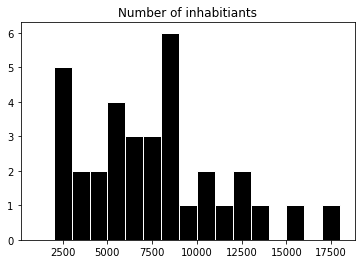

In [19]:
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000]
plt.hist(num, bins=bins, color='black', edgecolor='white')
#plt.savefig('hist_example.png')
plt.title('Number of inhabitiants')

### Bar and column charts 
Well, you may ask yourself: Are not a bar and a column chart the same as a histogram - They look pretty similar. **NO, they are not equal!**. While a histogram groups data and put it into buckets, and a bar or a column chart put two pieces of information in relation. It is about visualizing the frequency distribution of an attribute using bars of different heights. To clear things up, we take our example einwohnerstatistik-31.12.2020.csv, the Python *matplotlib* library and create a bar chart.

The bar chart shows how many inhabitant lives in each district of Aachen.

How did we do this, well first we extracted the two columns of interest *StatBezName* and *Pers*. Next we put them all in the bar method, creating our chart. Everything that follows is just for adding information and improving the chart, such as labelling the axis, setting a title (all in all making it look nicer).

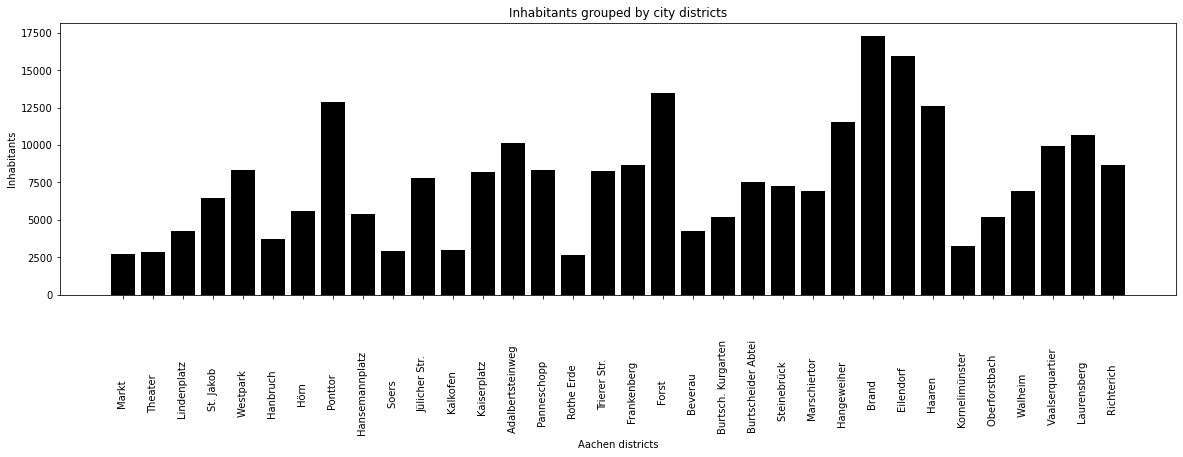

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))

dist = statistics['StatBezName']
counts = statistics['Pers']

ax.bar(dist, counts, color='black')

ax.set_ylabel('Inhabitants')
ax.set_xlabel('Aachen districts')
ax.set_title('Inhabitants grouped by city districts')
plt.xticks(rotation='vertical')
#plt.savefig('bar_example.png')
plt.show()

### Pie charts
These charts are interesting when it comes to present what proportion or share of your data has a particular value or influence. Pie charts are well known and easy to read. But let us take a look at an example anyway.

What we want to represent is the share of Men and Women for the Aachen district *Markt* - Pretty simple! 

So what do we need? First the labels *Women* and *Men*, we do this manually. Next the numbers from our data resource einwohnerstatistik-31.12.2020.csv. After having this information, we create a plot and using the Python *matplotlib* library to create a *pie*. This function gets all required attributes (we even specify the colours) and well that is basically it. 

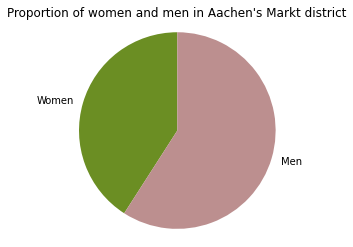

In [7]:
labels = ['Women', 'Men']
sizes = [statistics['W'].iloc[0], statistics['M'].iloc[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90, colors=['olivedrab', 'rosybrown'])
ax1.axis('equal')
ax1.set_title('Proportion of women and men in Aachen\'s Markt district')
#plt.savefig('pie_example.png')
plt.show()

### Scatterplots
Well, you have already seen a scattered plot when we talked about data analysis. Scattered plot display values for typically two variables for a data set, however they can also be used for multidimensional diagrams, but this is not part of this course.

Let us get back to the previous example, we already used in the Jupyter Notebook **05_data_analysis.ipynb**. One slightly changes, instead of using the original **AVV_Haltestellen.csv** file we saved the file with the necessary change to the coordinates (because we are lazy and don't want to do it again).

So first we import the necessary (additional) Python libraries and read the new data file **avv_stops.csv**. Next we create a subplot and set up all necessary information as for example x and y (longitude and latitude) value. To make it look nicely, we add colours. Using the *matplotlib* class scatter, we create a scatter plot for all these bus stops in Aachen (including their geolocation).

In [20]:
import geopandas
import pysal
import seaborn
import contextily
import os
avv_halt = pd.read_csv(r"./avv_stops.csv", sep=',')
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,longitude,latitude,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50.776453,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50.759141,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50.782274,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50.783114,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50.768538,de:05334:1005


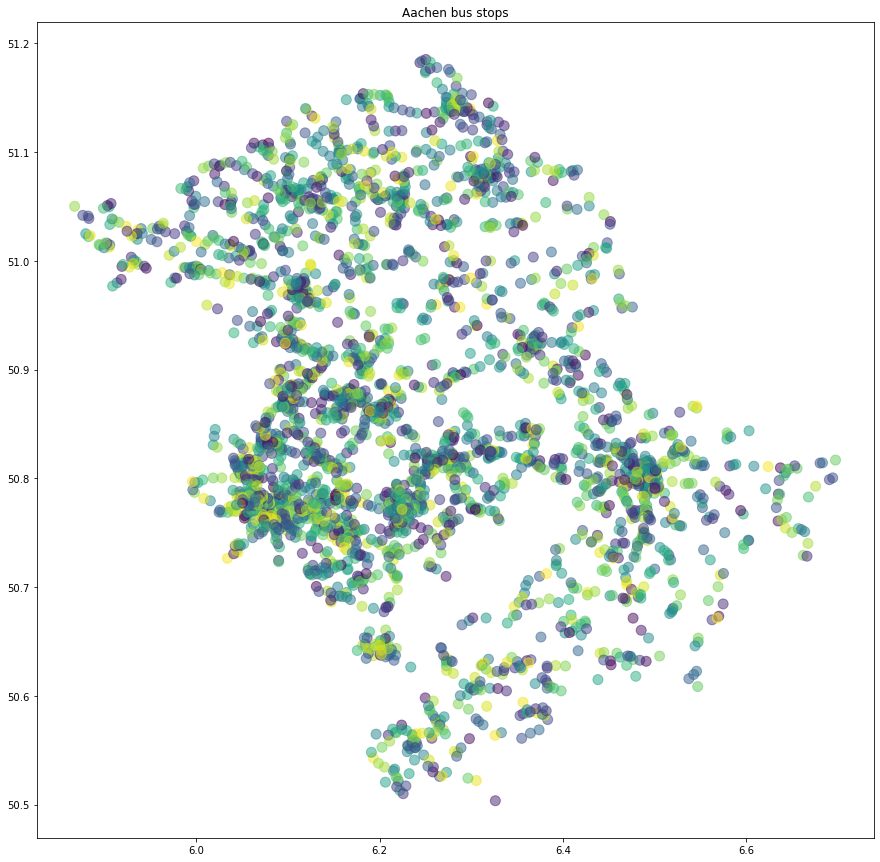

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
np.random.seed(19680801)
N = 2943
x = avv_halt['longitude']
y = avv_halt['latitude']
colors = np.random.rand(N)
area = 100 # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax.set_title('Aachen bus stops')
#plt.savefig('scatter_example.png')
plt.show()

# Box plots
In comparison to the other plots you have just seen, the box plot is slightly different. It represents a data set using its statistical data representation. It is a method to visualize locality, spread, and skewness of groups of numerical data through their quantiles.

The elements of a box plot diagram are:
* Minimum
* Maximum
* Median
* First quartile
* Third quartile

Let us take a look at an example again and let us move back to the einwohnerstatistik-31.12.2020.csv example. First we define some stile aspects, that we actually do not need since we have no flier properties. Next we create the subplot, followed by the title. Finally, we create the box plot based on the *Pers* column (Amount of inhabitant per district).

The red line you see in the plot represents the median, the black rectangle is the range from First to Third quartile and the link line the dashes on both side represent minimum and maximum.

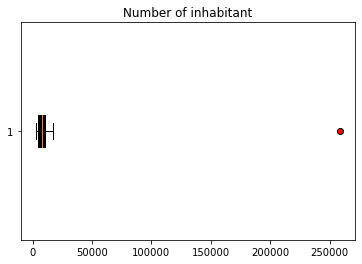

In [11]:
red_square = dict(markerfacecolor='r', marker='o')
fig5, ax5 = plt.subplots()
ax5.set_title('Number of inhabitant')
bplot = ax5.boxplot(statistics['Pers'], vert=False, patch_artist=True, flierprops=red_square)
plt.setp(bplot["boxes"], facecolor='black')
plt.savefig('boxplot_example.png')

# Maps

## Reference maps
This first sort of maps is structured to locate and identify important real-world features. All of these features are given equal visual prominence. Well, a reference map can create using different Python libraries, one example is the Python library *Ipyleaflet* - which provides for interactive maps. We will look a little deeper into interactive maps later in this notebook.

Plot can also be maps, when they represent geolocated data, as for example a scatter plot can do. So there is not necessarily a sharp dividing edge.

In [23]:
from ipyleaflet import Map, GeoData, basemaps, LayersControl
from ipyleaflet import Marker, Icon, Map
from ipyleaflet import Map, Marker, Popup
from ipywidgets import HTML
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

In [24]:
center = (50.775593, 6.082478)
map_ac = Map(center=center, zoom=15)
map_ac

Map(center=[50.775593, 6.082478], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

## Charts
Charts are a special type of reference maps, since they are meant to aid navigation and allow the reader to determine their position. It also helps to plot courses and routes. You find them for example along hiking routes.

## Thematic maps
This sort of map is used to emphasize particular features and events. There is a list of typical thematic maps (represented in the *Kresse and Danko: Springer handbook - Geographic Information*) which include:
* Isopleth
* Choropleth
* Dot density
* Graduated symbol
* Proportional symbol
* Cartograms
* Mental maps

You have already seen quite a lot of thematic maps. One for example was created in the Jupyter Notebook **04_data_preparation.ipynb**, when combining the Aachen districts and the number of inhabitants. Another one for example the created heat map in Jupyter Notebook **05_data_analysis.ipynb**.

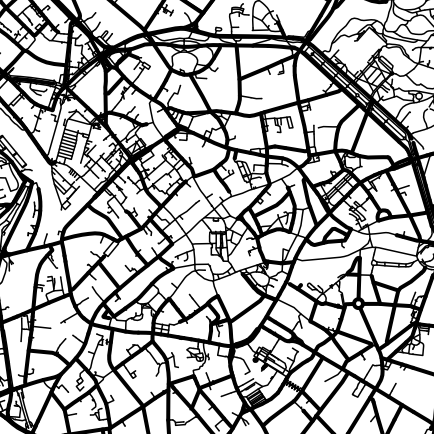

In [25]:
#Setting values for parameters
dpi=72
size=600
place = "Aachen, Germany"
fp = f"./aachen_col.png"
#Querying OSM data using a city name
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="walk",
    filepath=fp,
    dpi=dpi,
    bgcolor = "white",
    edge_color = "black",
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [26]:
#Defining required tags for quering OSM
tags={"building":True}
point = (50.775593, 6.082478)
size=500
dist = 1000
#OSMnx method geometries_from_point queryies OSM data using a point
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

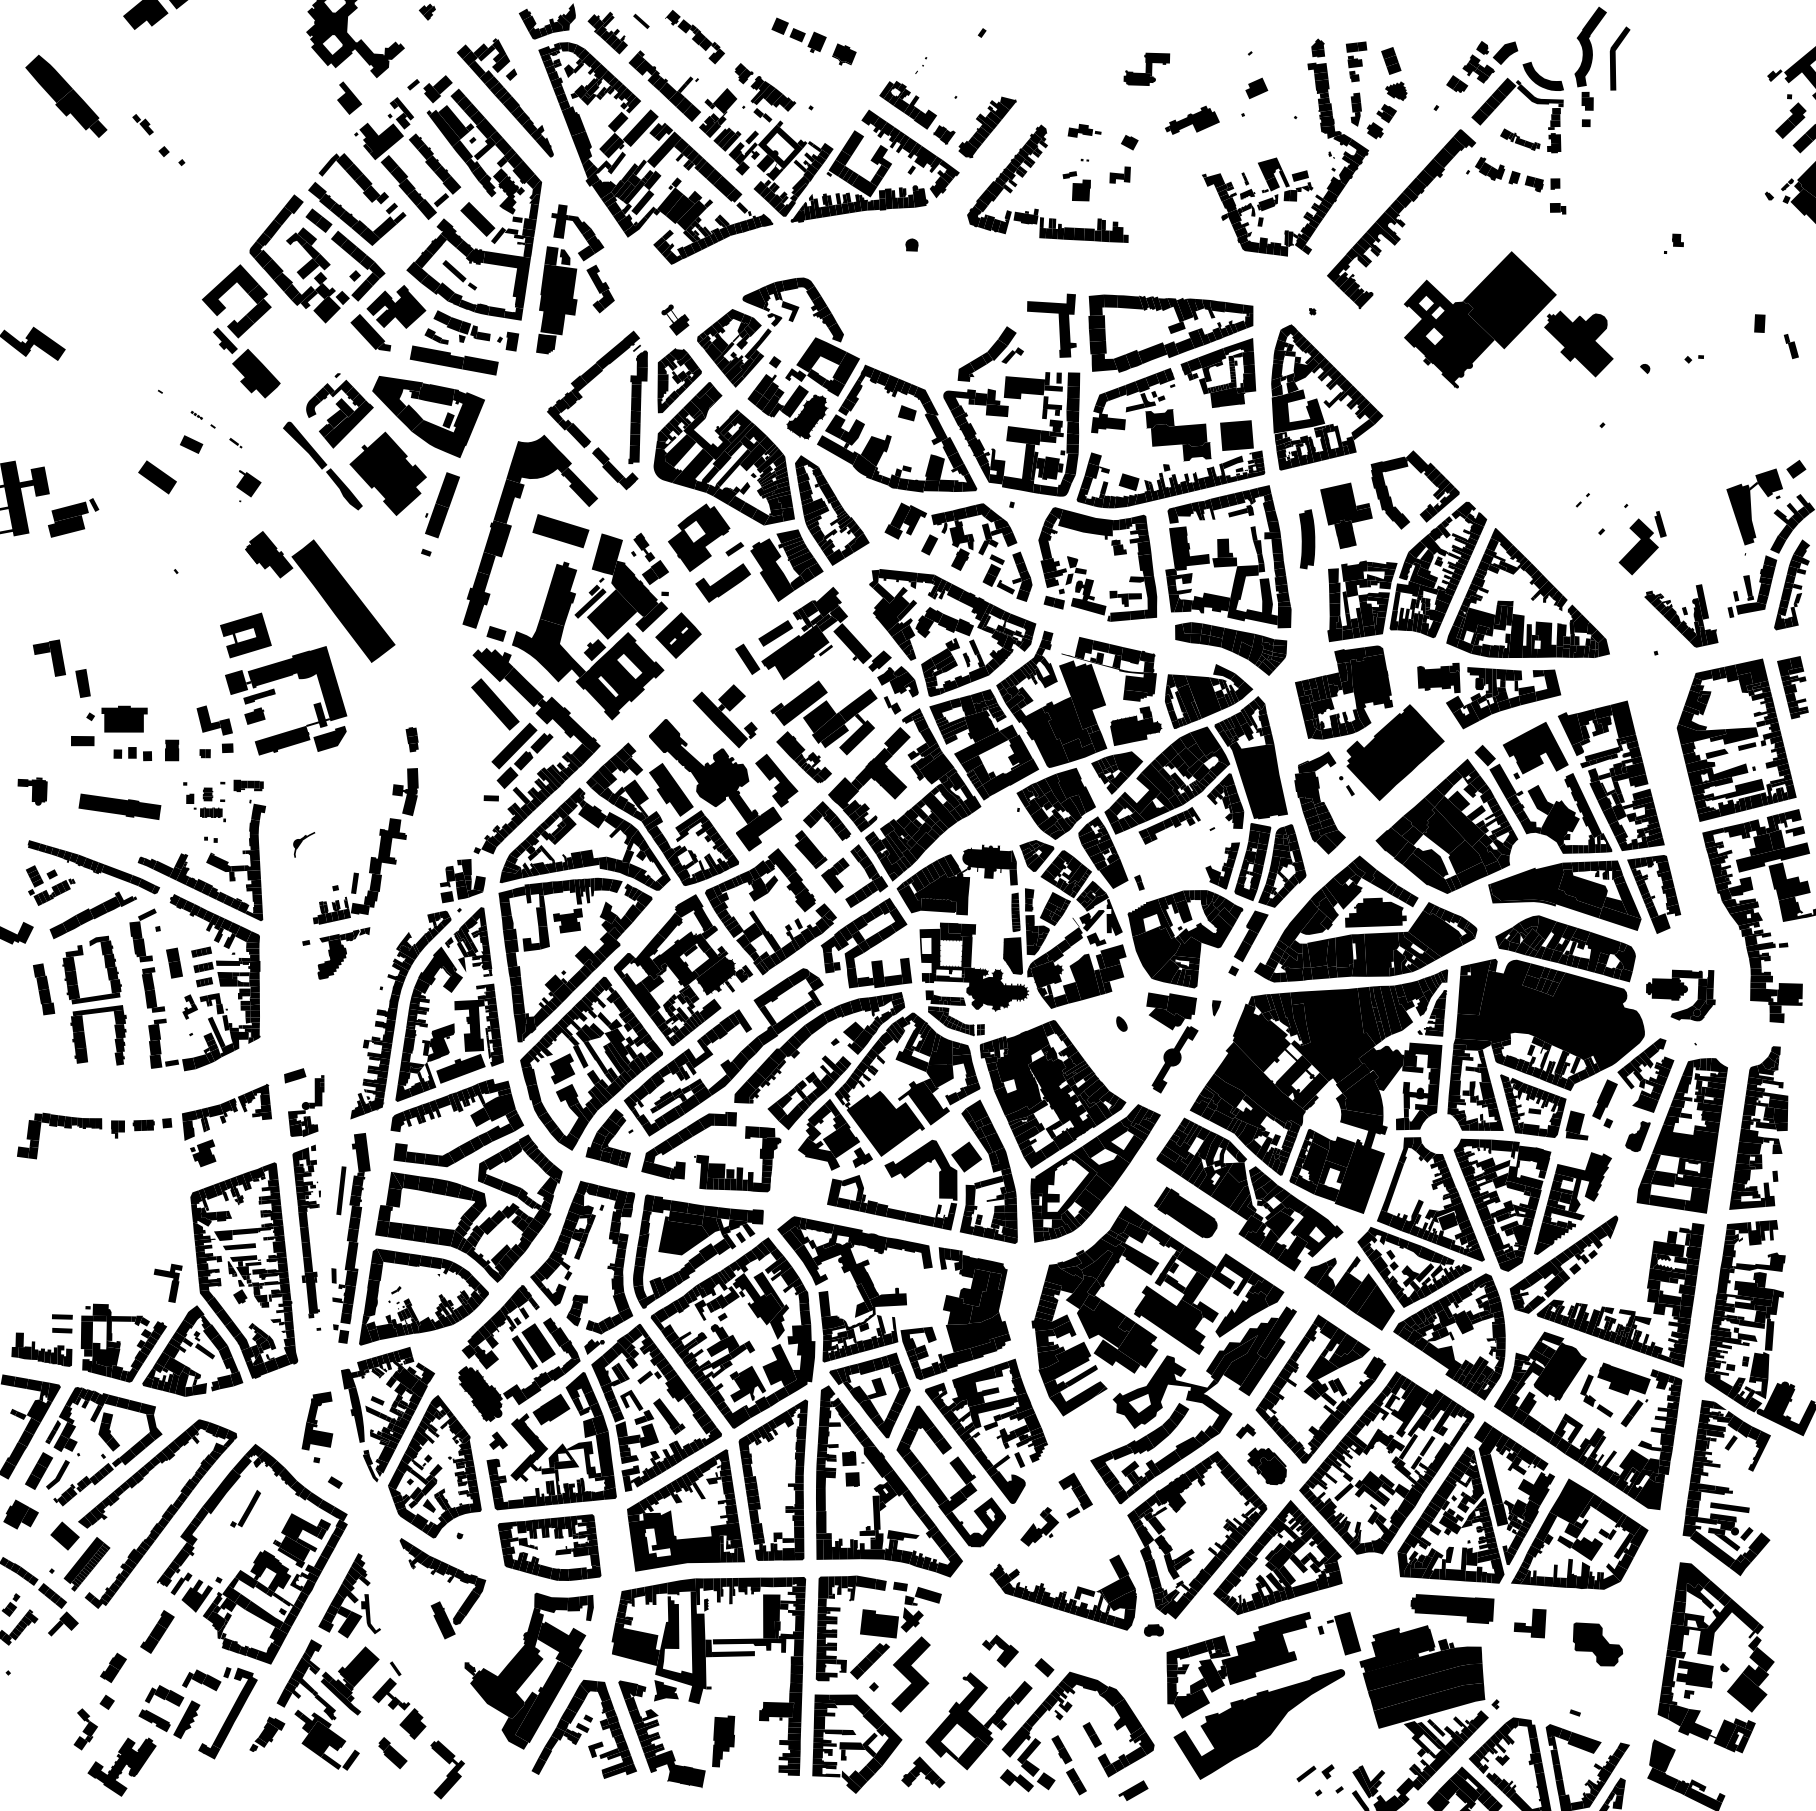

In [27]:
#Quering OSM by using the defined point
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_col_plan.png"
#Figure ground plan change colour
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="black",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Interactive maps - Using Python package ipyleaflet
*Ipyleaflet* is an interactive widgets' library, based on *ipywidgets*. Everything in *ipyleaflet* is interactive, attributes can be updated dynamically.

Let us create our first interactive plane map. Therefore, we need a centre point, a zoom level. You could actually add a specific [basemap](https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html).

In [ ]:
#change zoom level and another basemap
map_ac_new = Map(center=center, zoom = 3, basemap= basemaps.Esri.WorldTopoMap)
map_ac_new

Aachen is still the centre point, but due to zoom level, one can not see it any more.
### Creating icons 
We can do more than just create a map with a centre. So let us set some interactive icons. The following icon is the official leaflet icon in red. Let us make sure it becomes part of the map. 

![leaf](./img/leaf-red.png)

Well, it works and if you grab the leaf you can move it around as well, but be careful, this sort of visualization my not be precise enough, as you can hardly figure out what it is actually pointing at. But it looks nice anyway.

In [ ]:
center = (50.775593, 6.082478)
ac_m_ic = Map(center=center, zoom=10)
icon = Icon(icon_url='https://leafletjs.com/examples/custom-icons/leaf-red.png', icon_size=[38, 95], icon_anchor=[22,94])
mark = Marker(location=center, icon=icon, rotation_angle=90, rotation_origin='22px 94px')
ac_m_ic.add_layer(mark);
ac_m_ic

That was an easy one, because it is the official example for dynamic icons on maps. So, let us use our own icon. Anyway, it is interactive, so try to grab the tree and move it around.  
<div>
<img src="./img/baum.png" width="100"/>
</div>  

Well, we have to upload it first, as the parameter *icon_url* works much easier in *JupyterHub* using a URL. But using *just* Jupyter Notebooks on your computer giving a path such as *../files/img/baum.png* serves as well. You may already have a nice website where you can *just* upload a picture and use the URL, in case you do not you could use this one (caution, it is in German): https://abload.de/

In [ ]:
center = (50.775593, 6.082478)
ac_1m = Map(center=center, zoom=14)
icon = Icon(icon_url='https://git.rwth-aachen.de/noemi.kremer/gisbox-notebooks/-/raw/master/img/baum.png', icon_size=[70, 70], icon_anchor=[22,94])
mark = Marker(location=center, icon=icon)
ac_1m.add_layer(mark);
ac_1m

### Setting Marker for location
Probably everyone knows the location icon. In Google Maps it is usually red, here we use a blue one.

In [ ]:
center = (50.775593, 6.082478)
ac_c = Map(center=center, zoom=15)
marker = Marker(location=center, draggable=False)
ac_c.add_layer(marker);
ac_c

In [ ]:
message = HTML()
message.value = "A message for you!"
popup = Popup(
    location=center,
    close_button=False,
    auto_close=False,
    close_on_escape_key=False
)
ac_c.add_layer(popup)
marker.popup = message
ac_c

We just marked the centre point of Aachen. But there are maybe even more places to be marked in one map. Easy, first, we need to get the coordinates of our *other places*, in this example let us use the *Reiff Museum Aachen* and *Aachen Hauptbahnhof (central station)*. We query their coordinates using *OSMnx* and add them in a list. Next, we set a marker for every element in that list.

In [ ]:
reiff = ox.geocode("reiff museum aachen")
hbf = ox.geocode("Aachen Hauptbahnhof")
l = [center, reiff, hbf]

In [ ]:
ac_c = Map(center=center, zoom=14)
for elem in l:
    marker = Marker(location=elem, draggable=False)
    ac_c.add_layer(marker);

ac_c

In [ ]:
ac_c.save('my_map_new.html', title='My Map new')

### GeoDataFrame in ipyleaflet
Well, we can not just add icons to an interactive map, but also DataFrames and GeoDataFrames. Let us use the *Reiff museum*, we already have its coordinates, that will be our centre point. Next we need a GeoDataFrame (or a DataFrame, but in this example it is a GeoDataFrame). To get one we go ahead and query OSM (using *OSMnx*) for geometries around the Reiff museum which are declared to be buildings within a distance of 100. Finally, we add the geometries to our map as a new layer.

In [ ]:
#Get geometries quering OSM
rdf = ox.geometries_from_point(reiff, tags={"building":True},dist=100)

In [ ]:
#Set up map, careful with the zoom level!
m = Map(center=reiff, zoom = 16)

In [ ]:
#Adding the GeoDataFrame to the map
geo_data = GeoData(geo_dataframe= rdf, style={'color': 'black', 'fillColor': '#3c758c', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6})
m.add_layer(geo_data)
m

In [ ]:
m.save('my_map.html', title='My Map')